In [56]:
#%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('data.csv')
df[df.Year == 1997]

,Year,Weekday,Women,Men
4,1997,Fri,2,50
30,1997,Mon,17,35
56,1997,Sat,2,50
82,1997,Sun,17,35
108,1997,Thu,14,38
134,1997,Tue,19,33
160,1997,Wed,10,43


In [58]:
df['Total'] = df.Men+ df.Women
df['Percent'] = (df.Women / df.Total) * 100
df['Percent'] = df.Percent.round(0)
df[df.Year == 1997]

,Year,Weekday,Women,Men,Total,Percent
4,1997,Fri,2,50,52,4.0
30,1997,Mon,17,35,52,33.0
56,1997,Sat,2,50,52,4.0
82,1997,Sun,17,35,52,33.0
108,1997,Thu,14,38,52,27.0
134,1997,Tue,19,33,52,37.0
160,1997,Wed,10,43,53,19.0


In [59]:
dfp = df.pivot_table(index='Year', columns='Weekday', values='Percent')
column_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
dfp = dfp.reindex(column_order, axis=1)
dfp.head()

Weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Year,,,,,,,
1993,17.0,33.0,33.0,50.0,17.0,0.0,33.0
1994,19.0,21.0,17.0,13.0,4.0,2.0,27.0
1995,19.0,17.0,25.0,21.0,8.0,12.0,28.0
1996,38.0,32.0,23.0,27.0,2.0,6.0,27.0
1997,33.0,37.0,19.0,27.0,4.0,4.0,33.0


In [60]:
# add the avg 
dfp['Avg'] = dfp.mean(axis=1).round(0)
dfp.head()

Weekday,Mon,Tue,Wed,Thu,Fri,Sat,Sun,Avg
Year,,,,,,,,
1993,17.0,33.0,33.0,50.0,17.0,0.0,33.0,26.0
1994,19.0,21.0,17.0,13.0,4.0,2.0,27.0,15.0
1995,19.0,17.0,25.0,21.0,8.0,12.0,28.0,19.0
1996,38.0,32.0,23.0,27.0,2.0,6.0,27.0,22.0
1997,33.0,37.0,19.0,27.0,4.0,4.0,33.0,22.0


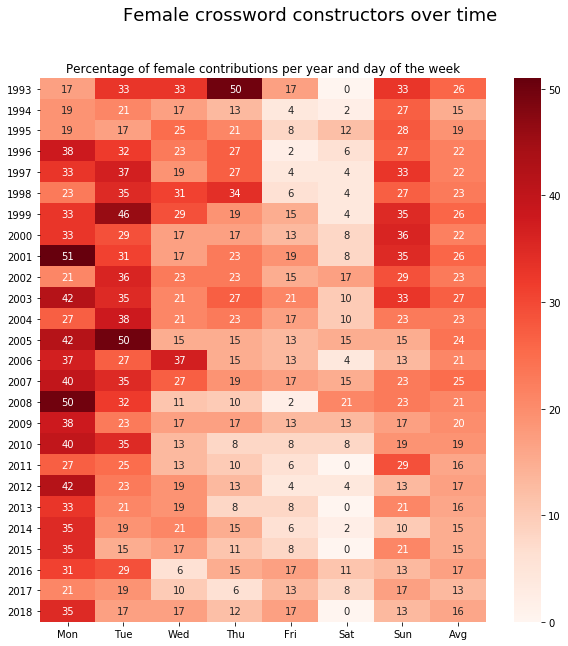

In [77]:
import seaborn as sns
%matplotlib inline

dfh = pd.DataFrame(dfp.values, index=list(dfp.index), columns=column_order + ['Avg'])
fig, ax = plt.subplots(figsize=(10,10))  # Sample figsize in inches
ax.set_title('Percentage of female contributions per year and day of the week')
fig.suptitle('Female crossword constructors over time', fontsize=18)
sns.heatmap(dfh, annot=True,  fmt='g', cmap='Reds', ax=ax)
plt.savefig('constructors.png')